# Лекция 5

Взяли выборку, поделили примерно пополам. На тестовой группе предлагаем клиенту скидку в 20%. Гипотеза заключается в том, что скидка увеличивает конверсию в продажу.

Результаты получились следующими:

Контроль: из 16500 наблюдений 1599 покупок

Тест: из 15903 наблюдений 1580 покупок

Мы уверены, что конверсия на тесте должна быть не хуже контроля и ожидаем уровень значимости alpha=0.05

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import kstest, fligner, shapiro, mannwhitneyu, norm
from statsmodels.stats.weightstats import _tconfint_generic

%matplotlib inline

In [3]:
n1 = 16500
a = 1599
n2 = 15903
b = 1580
p1 = a/n1
p2 = b/n2
P = (p1*n1+p2*n2)/(n1+n2)
Z = (p1 - p2)/np.sqrt(P*(1-P)*(1/n1+1/n2))

In [4]:
Z

-0.7391350963987632

In [8]:
norm.sf(abs(Z))

0.22991248360663058

Тот же сайт, но теперь тестируем следующее:

в группе B (тест) предлагаем покупателям дополнительно добавить в корзину еще один товар по скидке
контрольной группе А ничего не предлагаем.

Результаты теста лежат в приложенном файле. В первой колонке флаг тестовой группы, во второй - сумма всех покупок посетителя.

Требуется определить, есть ли **статзначимое различие в распределениях на тесте и контроле** с уровнем значимости alpha=0.05

In [10]:
df = pd.read_excel("5_3_data.xlsx")

In [11]:
df.columns = ['group', 'purchase']
df.group.replace({'А': 'A', 'В':'B'}, inplace=True)

In [12]:
df.head()

,group,purchase
0,A,1499
1,A,1499
2,A,1099
3,A,1099
4,A,109


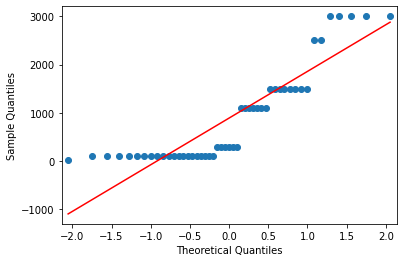

In [14]:
qqplot(df[df.group == 'A']['purchase'], line='s')
plt.show()

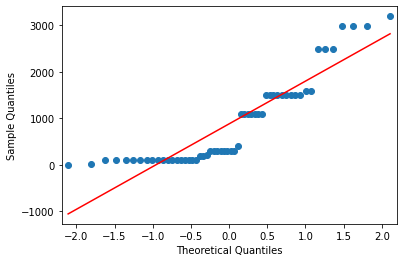

In [15]:
qqplot(df[df.group == 'B']['purchase'], line='s')
plt.show()

In [16]:
stat, p = shapiro(df[df.group == 'A']['purchase'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.776, p=0.000


In [17]:
stat, p = shapiro(df[df.group == 'B']['purchase'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.806, p=0.000


In [21]:
kstest(df[df.group == 'A']['purchase'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [24]:
kstest(df[df.group == 'B']['purchase'], 'norm')

KstestResult(statistic=0.9821428571428571, pvalue=2.5263905216950436e-98)

Выборки не имеют нормальное распределение.

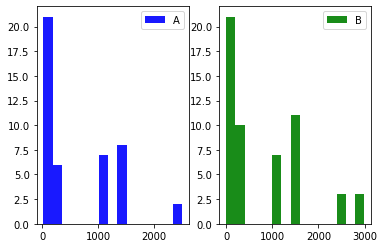

In [20]:
plt.subplot(1,2,1)
plt.hist(df[df.group == 'A']['purchase'][df[df.group == 'A']['purchase'] < df[df.group == 'A']['purchase'].quantile(0.99)],
           bins = 15,
           color = 'b',
           alpha = 0.9,
           label = 'A')
plt.legend()
plt.subplot(1,2,2)
plt.hist(df[df.group == 'B']['purchase'][df[df.group == 'B']['purchase'] < df[df.group == 'B']['purchase'].quantile(0.99)],
           bins = 15,
           color = 'g',
           alpha = 0.9,
           label = 'B')
plt.legend()
plt.show()

In [22]:
fligner(df[df.group == 'A']['purchase'], df[df.group == 'B']['purchase'])

FlignerResult(statistic=0.0168346974159353, pvalue=0.8967653357341644)

Гипотезу об одинаковых дисперсиях не отвергаем

In [23]:
stat, p = mannwhitneyu(df[df.group == 'A']['purchase'], df[df.group == 'B']['purchase'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1317.500, p=0.721


Центры (медианы) 2х выборок совпадают

In [26]:
monthly_income_conf_int = _tconfint_generic(df[df.group == 'A']['purchase'].mean(),
                                            df[df.group == 'A']['purchase'].std(ddof=1)/np.sqrt(len(df[df.group == 'A'])),
                                            len(df[df.group == 'A']) - 1,
                                            0.05,
                                            'two-sided')
required_conf_int = _tconfint_generic(df[df.group == 'B']['purchase'].mean(),
                                            df[df.group == 'B']['purchase'].std(ddof=1)/np.sqrt(len(df[df.group == 'B'])),
                                            len(df[df.group == 'B']) - 1,
                                            0.05,
                                            'two-sided')

print(f'A 95% confidence interval: [{monthly_income_conf_int[0]:,.2f} - {monthly_income_conf_int[1]:,.2f}]')
print(f'B 95% confidence interval: [{required_conf_int[0]:,.2f} - {required_conf_int[1]:,.2f}]')

A 95% confidence interval: [610.84 - 1,171.65]
B 95% confidence interval: [632.41 - 1,129.94]


Доверительные интервалы также пересекаются